In [13]:
import torch
from torch import nn,optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
x_train=np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                    [9.779],[6.182],[7.59],[2.167],[7.042],
                    [10.791],[5.313],[7.997],[3.1]],dtype=np.float32)

y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                    [3.366],[2.596],[2.53],[1.221],[2.827],
                    [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)

In [5]:
class linearr(nn.Module):
    def __init__(self):
        super(linearr,self).__init__()
        self.linear=nn.Linear(1,1) #1维的输入输出
    def forward(self,x):
        out=self.linear(x)
        return out
model=linearr()
criterion=nn.MSELoss()
opt=optim.SGD(model.parameters(),lr=1e-4)

In [9]:
num_epochs=1000
for epoch in range(num_epochs):
    inputs=x_train
    target=y_train
    
    out=model(inputs)
    loss=criterion(out,target)
    
    opt.zero_grad()  #每次迭代时须重置为0
    loss.backward()  #计算梯度
    opt.step()  #更新权重
    if (epoch+1)%20==0:
        print('epoch[{}/{}],loss:{:.6f}'.format(epoch+1,num_epochs,loss.data[0]))
    

epoch[20/1000],loss:12.389167
epoch[40/1000],loss:8.907628
epoch[60/1000],loss:6.446966
epoch[80/1000],loss:4.707801
epoch[100/1000],loss:3.478550
epoch[120/1000],loss:2.609679
epoch[140/1000],loss:1.995506
epoch[160/1000],loss:1.561336
epoch[180/1000],loss:1.254386
epoch[200/1000],loss:1.037346
epoch[220/1000],loss:0.883851
epoch[240/1000],loss:0.775265
epoch[260/1000],loss:0.698418
epoch[280/1000],loss:0.644004
epoch[300/1000],loss:0.605443
epoch[320/1000],loss:0.578087
epoch[340/1000],loss:0.558650
epoch[360/1000],loss:0.544810
epoch[380/1000],loss:0.534925
epoch[400/1000],loss:0.527836
epoch[420/1000],loss:0.522723
epoch[440/1000],loss:0.519006
epoch[460/1000],loss:0.516277
epoch[480/1000],loss:0.514246
epoch[500/1000],loss:0.512707
epoch[520/1000],loss:0.511518
epoch[540/1000],loss:0.510575
epoch[560/1000],loss:0.509806
epoch[580/1000],loss:0.509161
epoch[600/1000],loss:0.508603
epoch[620/1000],loss:0.508106
epoch[640/1000],loss:0.507654
epoch[660/1000],loss:0.507232
epoch[680/100

D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


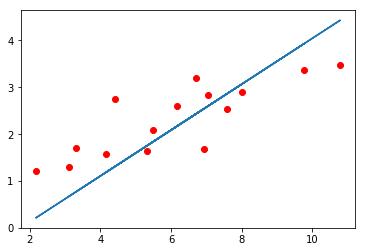

In [18]:
model.eval() #一般在模型训练和评价的时候会加上这句，
#主要是针对model 在训练时和评价时不同的 Batch Normalization  和  Dropout 方法模式
pre=model(x_train)
pre=pre.data.numpy()
plt.plot(x_train.numpy(),y_train.numpy(),'ro')
plt.plot(x_train.numpy(),pre)

In [25]:
torch.save(model,'ss')

D:\anaconda\lib\site-packages\torch\serialization.py:193: UserWarning: Couldn't retrieve source code for container of type linearr. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [26]:
torch.load('ss')

linearr(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)